# Imports

In [55]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Read the Data

In [56]:
df = pd.read_csv('optdigits.csv')
df

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,...,Dim56,Dim57,Dim58,Dim59,Dim60,Dim61,Dim62,Dim63,Dim64,Class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
3819,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
3820,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
3821,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


# Visualization

In [57]:
X = df.copy()
X.isnull().sum()

Dim1     0
Dim2     0
Dim3     0
Dim4     0
Dim5     0
        ..
Dim61    0
Dim62    0
Dim63    0
Dim64    0
Class    0
Length: 65, dtype: int64

In [58]:
X.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,...,Dim56,Dim57,Dim58,Dim59,Dim60,Dim61,Dim62,Dim63,Dim64,Class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


I use Pythagorean Theorem here to combine these two variables into one distance variable that we can use to find the shortest distance.

# Initatiization using KMeans++

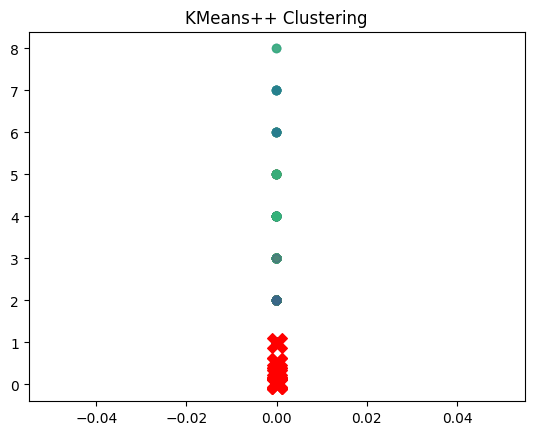

In [59]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create synthetic data for demonstration
# X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
temp = np.array(df)

# Use KMeans++ initialization in KMeans clustering
kmeans_pp = KMeans(n_clusters=10, init='k-means++', random_state=0)
kmeans_pp.fit(temp)

# Plot the results
plt.scatter(temp[:, 0], temp[:, 1], c=kmeans_pp.labels_, cmap='viridis', alpha=0.7)
plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title('KMeans++ Clustering')
plt.show()

# Train the Model

In [36]:
#Find which cluster each data-point belongs to
clusters = kmeans_pp.predict(df)

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but KMeans was fitted without feature names

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [37]:
#Add the cluster vector to our DataFrame, X
df["Cluster"] = clusters

# Visualization Using PCA

In [38]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
# need to take a stratified random sample
plotX = df

In [39]:
#Rename plotX's columns since it was briefly converted to an np.array above
# plotX.columns = X.columns

In [40]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [41]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packa

In [42]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [43]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [44]:
plotX["dummy"] = 0

In [45]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]
cluster3 = plotX[plotX["Cluster"] == 3]
cluster4 = plotX[plotX["Cluster"] == 4]
cluster5 = plotX[plotX["Cluster"] == 5]
cluster6 = plotX[plotX["Cluster"] == 6]

In [46]:
#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)


In [47]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [48]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter(
                    x = cluster3["PC1_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(0, 100, 200, 0.8)'),
                    text = None)

trace5 = go.Scatter(
                    x = cluster4["PC1_2d"],
                    y = cluster4["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 180, 200, 0.8)'),
                    text = None)

trace6 = go.Scatter(
                    x = cluster5["PC1_2d"],
                    y = cluster5["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'rgba(100, 100, 200, 0.8)'),
                    text = None)

trace7 = go.Scatter(
                    x = cluster6["PC1_2d"],
                    y = cluster6["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'rgba(20, 100, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [49]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
                    text = None)

trace5 = go.Scatter3d(
                    x = cluster4["PC1_3d"],
                    y = cluster4["PC2_3d"],
                    z = cluster4["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 255, 0, 0.8)'),
                    text = None)

trace6 = go.Scatter3d(
                    x = cluster5["PC1_3d"],
                    y = cluster5["PC2_3d"],
                    z = cluster5["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text = None)

trace7 = go.Scatter3d(
                    x = cluster6["PC1_3d"],
                    y = cluster6["PC2_3d"],
                    z = cluster6["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'rgba(255, 255, 0, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# Performance

In [60]:
print(kmeans_pp.inertia_) # sklearn built in sse metric

2491506.378619139


In [61]:
df.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,...,Dim56,Dim57,Dim58,Dim59,Dim60,Dim61,Dim62,Dim63,Dim64,Class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [62]:
import numpy as np

# Check for NaN values
print(np.isnan(X).any())

# Check for infinite values
print(np.isinf(X).any())

Dim1     False
Dim2     False
Dim3     False
Dim4     False
Dim5     False
         ...  
Dim61    False
Dim62    False
Dim63    False
Dim64    False
Class    False
Length: 65, dtype: bool
Dim1     False
Dim2     False
Dim3     False
Dim4     False
Dim5     False
         ...  
Dim61    False
Dim62    False
Dim63    False
Dim64    False
Class    False
Length: 65, dtype: bool


In [63]:
# silhoutte score 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# sample = pd.DataFrame(np.array(X.sample(5000)))

for n_clusters in range(5, 12):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_
    # print('here')
    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
# print(silhoutte_score(X, ))

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packa

For n_clusters = 5, silhouette score is 0.14618877564912472)


/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packa

For n_clusters = 6, silhouette score is 0.1627189618321229)


/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packa

For n_clusters = 7, silhouette score is 0.17310530470875263)


/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packa

For n_clusters = 8, silhouette score is 0.1827616964246372)


/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packa

For n_clusters = 9, silhouette score is 0.1905953157929059)


/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packa

For n_clusters = 10, silhouette score is 0.19436674536945786)
For n_clusters = 11, silhouette score is 0.1920231447653198)


/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/ryandpark/miniconda3/envs/py311/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



silhoutte score for values of k 2-8 are poor 